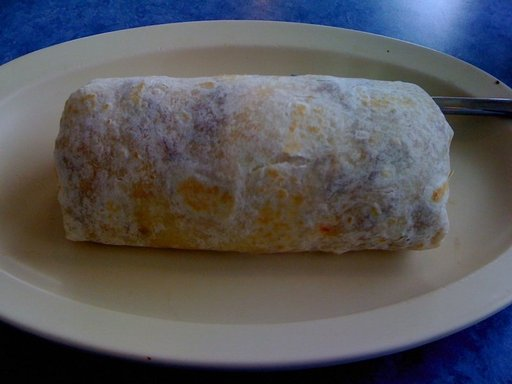

In [23]:
from PIL import Image
import requests

url = 'https://huggingface.co/Jacques7103/Food-Recognition/resolve/main/273350.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [2]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "Jacques7103/Food-Recognition"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

preprocessor_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ferdi\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [10]:
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [15]:
import torch

with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [35]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: breakfast_burrito


In [36]:
from transformers import pipeline
pipe = pipeline("image-classification", "Jacques7103/Food-Recognition")

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [37]:
pipe(image)

[{'score': 0.9783581495285034, 'label': 'breakfast_burrito'},
 {'score': 0.013447973877191544, 'label': 'beignets'},
 {'score': 0.0028397405985742807, 'label': 'bread_pudding'},
 {'score': 0.001164174173027277, 'label': 'apple_pie'},
 {'score': 0.0010923228692263365, 'label': 'baklava'}]

In [38]:
pipe = pipeline("image-classification", 
                model=model,
                feature_extractor=feature_extractor)

In [45]:
pipe(image)

[{'score': 0.9783581495285034, 'label': 'breakfast_burrito'},
 {'score': 0.013447973877191544, 'label': 'beignets'},
 {'score': 0.0028397405985742807, 'label': 'bread_pudding'},
 {'score': 0.001164174173027277, 'label': 'apple_pie'},
 {'score': 0.0010923228692263365, 'label': 'baklava'}]

In [40]:
import pandas as pd

df = pd.read_csv("ingredients.csv", encoding = "windows-1252")
df

,Name,Ingredients
0,apple_pie,['2 3/4 cups all-purpose flour; divided; plus ...
1,baby_back_ribs,['5 Tbsp (75 mL) packed brown sugar'; '3 Tbsp ...
2,baklava,['3 1/2 cups walnuts; chopped'; '1/2 cup sugar...
3,beef_carpaccio,['2 teaspoons whole black peppercorns';'2 teas...
4,beef_tartare,['1 8-ounce boneless New York strip steak'; 'K...
5,beet_salad,['4 medium red or golden beets (4 ounces each)...
6,beignets,['1 cup lukewarm milk; about 110ï¿½F'; '1/2 cu...
7,bibimbap,['3/4 cup soy sauce'; '6 tablespoons toasted s...
8,bread_pudding,['25 ounces brioche; sliced'; '4 cups whole mi...
9,breakfast_burrito,['4 eggs'; '2 tablespoons milk'; '3/4 cup pint...


In [48]:
for i in range(10):
    if df['Name'][i] == model.config.id2label[predicted_class_idx]:
        print("Recipe for", model.config.id2label[predicted_class_idx], "is :", df['Ingredients'][i])

Recipe for breakfast_burrito is : ['4 eggs'; '2 tablespoons milk'; '3/4 cup pinto beans; cooked; rinsed and drained'; '1/2 cup salsa'; 'canola oil spray; oil or butter for pan'; '2 corn tortillas; warmed if desired'; 'sour cream; cheese or avocado; optional']
